(50000, 28, 28) (50000,)


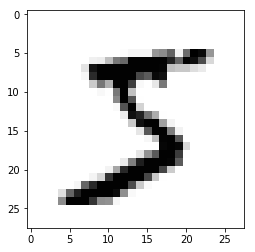

In [2]:
#from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [3]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import time

# Build the network

In [4]:
hidden_1_size = 100
hidden_2_size = 50
g = tf.Graph()
with g.as_default():
    input_x = tf.placeholder(tf.float32,shape= [None,28,28])
    input_y = tf.placeholder(tf.int32,shape=[None,])
    
    x = tf.reshape(input_x,[-1,28*28])
    y = tf.one_hot(input_y,depth=10,axis=-1)
    
    w1 = tf.Variable(tf.truncated_normal([28*28,hidden_1_size],stddev=0.1),name='weight_1')
    b1 = tf.Variable(tf.zeros([hidden_1_size]),name='bias_1')
    w2 = tf.Variable(tf.truncated_normal([hidden_1_size,hidden_2_size],stddev=0.1),name='weight_2')
    b2 = tf.Variable(tf.zeros([hidden_2_size]),name='bias_1')
    w3 = tf.Variable(tf.truncated_normal([hidden_2_size,10],stddev=0.1),name='weight_3')
    b3 = tf.Variable(tf.zeros([10,]),name = 'bias_3')

    
    fc1 = tf.nn.relu(tf.nn.bias_add(tf.matmul(x,w1),b1))
    fc2 = tf.nn.sigmoid(tf.nn.bias_add(tf.matmul(fc1,w2),b2))
    
    logits = tf.nn.bias_add(tf.matmul(fc2,w3),b3)
    probs = tf.nn.softmax(logits)
    preds = tf.argmax(logits,axis=1)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits))
    optimizer = tf.train.AdamOptimizer().minimize(loss)

# Training part

In [5]:
X = X_train
Y = y_train

epochs = 10
batch_size = 32
iters = (X.shape[0] - 1)//batch_size + 1
tr_loss_list = []
test_loss_list = []
time_start = time.time()
lr = 0.001
with tf.Session(graph=g) as sess:
#-------training part--------------
    sess.run(tf.global_variables_initializer())
    for e in range(epochs):
        X,Y = shuffle(X,Y)
        if e==5:
            optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss)
            lr = lr *0.9
        if e>5:
            optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss)
            lr = lr*0.9
        for j in range(iters):
            batch_x = X[j * batch_size:(j + 1) * batch_size,:]
            batch_y = Y[j * batch_size:(j + 1) * batch_size]
            _,batch_loss = sess.run([optimizer,loss],feed_dict={input_x:batch_x,input_y:batch_y})
           
        
        pred_tr_y = sess.run(preds,{input_x:X_train,})
        pred_val_y = sess.run(preds,{input_x:X_val})
        tr_acc = accuracy_score(y_train,pred_tr_y)
        val_acc = accuracy_score(y_val,pred_val_y)
        print("epoch ",e," train_acc ",tr_acc," val_acc ",val_acc)
        
        tr_loss_list.append(sess.run(loss,{input_x:X_train,input_y:y_train}))
        
        test_loss_list.append(sess.run(loss,{input_x:X_test,input_y:y_test}))
        
        
#----------------------evaluation part----------------
    pred_test_y = sess.run(preds,{input_x:X_test})
    test_acc = accuracy_score(y_test,pred_test_y)
    print(" test_acc ",test_acc)
        
print("total time ",time.time()-time_start,"seconds")


epoch  0  train_acc  0.95026  val_acc  0.9549
epoch  1  train_acc  0.96928  val_acc  0.9643
epoch  2  train_acc  0.97826  val_acc  0.9708
epoch  3  train_acc  0.98526  val_acc  0.9721
epoch  4  train_acc  0.98894  val_acc  0.9742
epoch  5  train_acc  0.98984  val_acc  0.9751
epoch  6  train_acc  0.99016  val_acc  0.9757
epoch  7  train_acc  0.9905  val_acc  0.9762
epoch  8  train_acc  0.99052  val_acc  0.9764
epoch  9  train_acc  0.99072  val_acc  0.9763
 test_acc  0.975
total time  104.640798330307 seconds


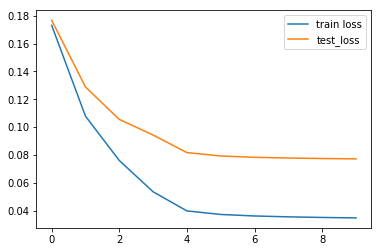

In [6]:
plt.plot(tr_loss_list,label='train loss')
plt.plot(test_loss_list,label='test_loss')
plt.legend()